In this assignment, we will see how to distinguish two signals. The frequencies of these signals are close to each other. 

### Part A
Generate two sinusoidal signals where $f=5$ Hz and $\Delta _f= 3$ Hz, the time duration of the signal is $T=1$:

$ x_1(t)=cos(2 \pi f_1 t)$ and $ x_2(t)=cos(2 \pi (f_1+\Delta _f) t)$

Suppose we have received the signal $x(t)$ where $x(t)=x_1(t)+x_2(t)$ and we will try to analyze the frequency domain respresentation of this signal. Take the Fourier Transform using np.fft.fft function. Use DFT size $N=64$, sampling frequency $f_s=64$ and $T=1$ that is the time duration that you will have samples. Plot $x(t)$ and $X(k)$ which is the Fourier Transform of x(t). Label the axes and write an appropriate title. You can use np.fft.fftshift in order to shift the zero-frequency component to the center of the spectrum (otherwise you will have spikes at both ends of your x axes). Do not forget to write labels and titles to your figures.

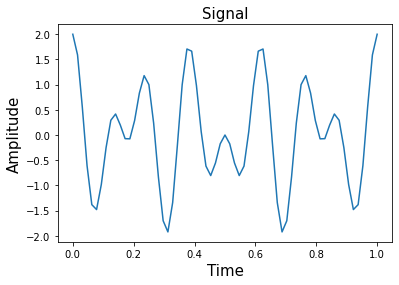

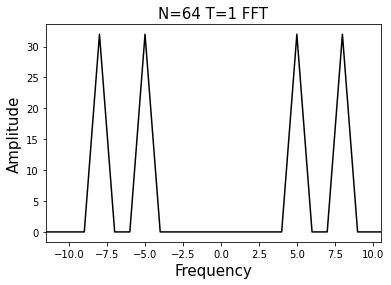

In [192]:
import numpy as np
import matplotlib.pyplot as plt

#write your code here
f1=5
delta_f=3
f2=f1+delta_f
time=1
N=64
def mycoswave(freq,samp_rt,max_duration):
    
    t=np.arange(0,max_duration+1/samp_rt,1/samp_rt)
    signal=np.cos(2*np.pi*freq*t)
    
    return t,signal

def myfft(N):
    t,x1=mycoswave(f1,64,time)
    t,x2=mycoswave(f2,64,time)
    x=x1+x2
    dft=np.fft.fft(x,N)
    dft=np.fft.fftshift(dft)
    fval=np.arange(-N/2,N/2,1)
    
    return fval,dft,t,x
    
fval1,dft1,t,x=myfft(N)

def myfftplot(xaxis,yaxis,title,labelx,labely):

    plt.figure()
    plt.title(title,size=15)
    plt.xlabel(labelx,size=15)
    plt.ylabel(labely,size=15)
    plt.margins(x=-(0.325))
    plt.plot(xaxis,yaxis,"k")
    plt.show()
    
plt.figure()
plt.title("Signal",size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Amplitude",size=15)
plt.plot(t,x)

myfftplot(fval1,abs(dft1),"N=64 T=1 FFT","Frequency","Amplitude")

Can you distinguish two signals in frequency domain? Explain. What are the frequencies of these two signals?

Yes, we can distinguish x1 and x2. x1 has 5Hz and x2 has 8Hz frequency.  

## Part B

In this part we will change $\Delta_f$ to $0.5$ Hz, and repeat Part A. In this case can you seperate the two signals? Why? Explain.

No, we can not seperate becasue signals frequencies are very close to each other. (5Hz and 5.5Hz )

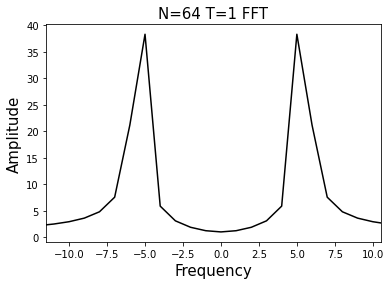

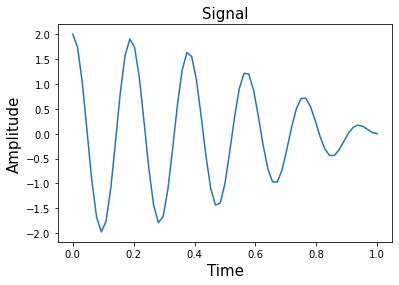

In [193]:
#write your code here
f1=5
delta_f=0.5
f2=f1+delta_f
time=1
N=64
fval1,dft1,t,x=myfft(N)
myfftplot(fval1,abs(dft1),"N=64 T=1 FFT","Frequency","Amplitude")
plt.figure()
plt.title("Signal",size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Amplitude",size=15)
plt.plot(t,x)
plt.show()

### Part C

What can we do to distinguish signals whose frequencies are close? Can we seperate it by increasing the DFT size? Take $N=512$ and repeat part B.  


We can increase the N value to seperate signals x1 and x2. However, in this case N=512 is not enough to seperate theese signals. Also increasing the N value is not only enough to seperate theese signal. Because If a higher resolution analysis is desired in the frequency domain, longer analyzes in the time domain are required according to the uncertainty law.

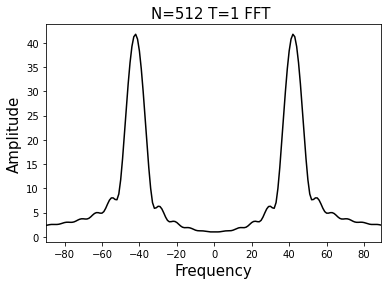

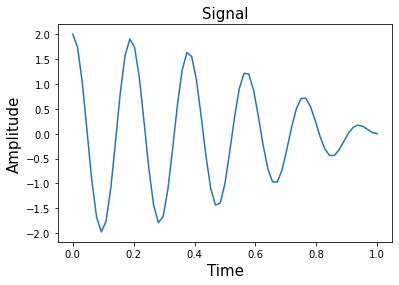

In [194]:
#write your code here
f1=5
delta_f=0.5
f2=f1+delta_f
time=1
N=512
fval1,dft1,t,x=myfft(N)
myfftplot(fval1,abs(dft1),"N=512 T=1 FFT ","Frequency","Amplitude")
plt.figure()
plt.title("Signal",size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Amplitude",size=15)
plt.plot(t,x)
plt.show()




If increasing DFT size is not enough to distinguish, what can we do? This problem is a consequence of uncertainty principle.

What is Uncertain?
If we analyze a signal in time and frequency together, then more we zoom in into time,
the equivalent amount we zoom out in frequency, and vice versa.
1) A sine wave from $-\infty$ to $+\infty$ has FT as impulse at frequency w. That is we are certain
in frequency domain but interval in time is large.
2) An impulse signal has FT as constant 1 over frequency $-\infty$ to $+\infty$. That is we are
certain in time but in frequency the spread is large. 

To get a high resolution of the frequency data of a signal, one needs to observe the signal
in time domain for a long interval. If one observes the signal in the time domain for only
a short interval, then the (frequency data) Fourier transform of the signal is more spreader
out. E.g.: In the DFT computation if one wishes to have closely spaced frequency
components i.e. high resolution of samples (n) in frequency domain, then one would
require an equal number of samples (n) in the time domain for analysis. This is equivalent
to saying that one should observe the signal for a longer interval.

Taken from "Chapter 3: The Uncertainty Principle & Time-Bandwidth Product" by Vineet Kumar and Kashinath Murmu. https://www.ee.iitb.ac.in/student/~pawar/Wavelet%20Applications/Chapters_review/ch03_Gr3_Gr2.pdf.

Therefore, to distinguish two signals we should sample through long duration. So change time duration to $T=2$ s and repeat Part B and C. Plot the frequency spectrums for $N=64, 1024$.  

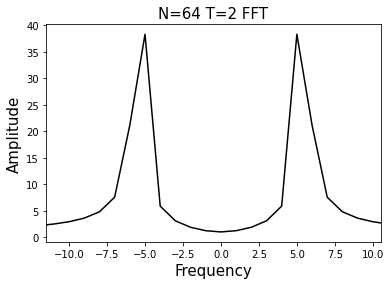

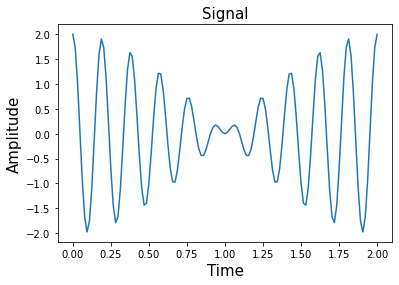

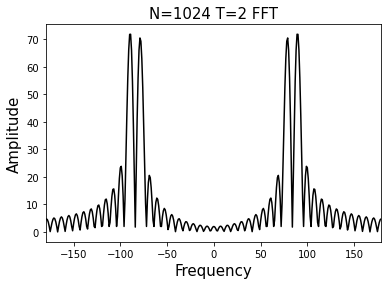

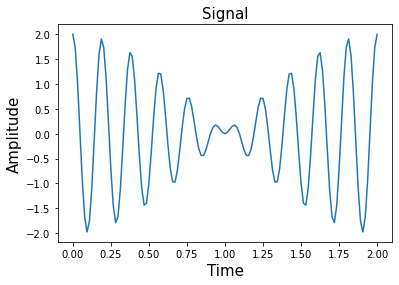

In [195]:
 # Time duration of the signal

#write your code here
f1=5
delta_f=0.5
f2=f1+delta_f
time=2

fval1,dft1,t1,x1=myfft(64)
fval2,dft2,t2,x2=myfft(1024)

myfftplot(fval1,abs(dft1),"N=64 T=2 FFT","Frequency","Amplitude")
plt.figure()
plt.title("Signal",size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Amplitude",size=15)
plt.plot(t1,x1)

##########################################################################

myfftplot(fval2,abs(dft2),"N=1024 T=2 FFT","Frequency","Amplitude")
plt.figure()
plt.title("Signal",size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Amplitude",size=15)
plt.plot(t2,x2)
plt.show()


Now what is difference between spectrums? In which case, you see two frequencies that are 0.5 Hz apart? Plot the positive part of the frequency spectrum and show the case when two frequencies are distinguishable. Explain the reasons behind this result. 

In this case, when the value of N is set to 64 and the duration of the signal is 2 seconds, this process was not sufficient to separate the two signals. Afterwards, when the duration is kept constant at 2 seconds and the N value is increased to 1024, the two signals become separated from each other.

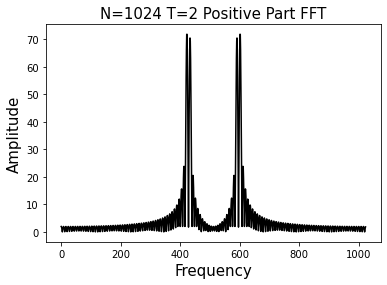

In [196]:
#write your code here
f1=5
delta_f=0.5
f2=f1+delta_f
time=2
N=1024

t,x1=mycoswave(f1,64,time)
t,x2=mycoswave(f2,64,time)
x=x1+x2
dft=np.fft.fft(x,N)
dft=np.fft.fftshift(dft)
fval=np.arange(0,N,1)

plt.figure()
plt.title("N=1024 T=2 Positive Part FFT",size=15)
plt.xlabel("Frequency",size=15)
plt.ylabel("Amplitude",size=15)
plt.plot(fval,abs(dft),"k")
plt.show()